In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [4]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_data = np.array(train_df)
test_data = np.array(test_df)

x_train = train_data[:, 1:]/255
y_train = train_data[:, 0]

x_test = test_data[:, 1:]/255
y_test = test_data[:, 0]

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_test.shape

(10000, 784)

In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=None,
)

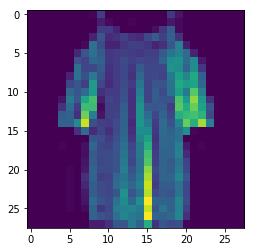

In [12]:
image = x_train[3].reshape((28,28))

plt.imshow(image)
plt.show()

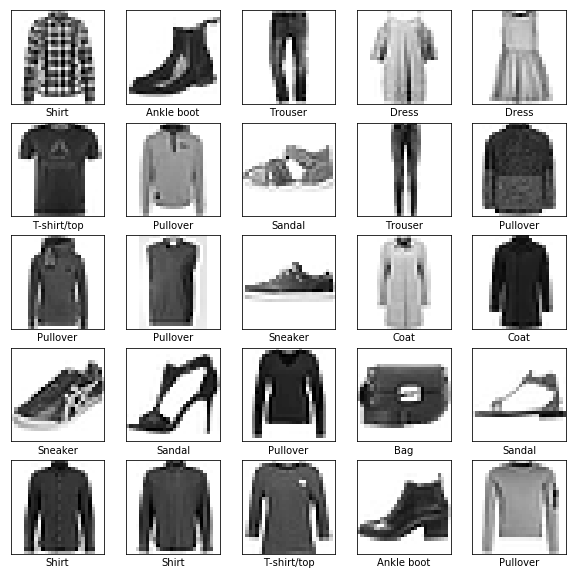

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]]) #list names takes only integer or slice values and not float values.

### Create the CNN
##### Define the model
##### Compile the model
##### Fit the model

In [14]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape {}'.format(x_train.shape))
print('x_test shape {}'.format(x_test.shape))
print('x_validate shape {}'.format(x_validate.shape))

x_train shape (48000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)
x_validate shape (12000, 28, 28, 1)


In [15]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [16]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [17]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=5, verbose=1,
    validation_data=(x_validate, y_validate),
    
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 49s 1ms/step - loss: 0.7599 - acc: 0.7487 - val_loss: 0.4728 - val_acc: 0.8340
Epoch 2/5
48000/48000 [==============================] - 43s 904us/step - loss: 0.4259 - acc: 0.8509 - val_loss: 0.4225 - val_acc: 0.8472
Epoch 3/5
48000/48000 [==============================] - 43s 904us/step - loss: 0.3744 - acc: 0.8689 - val_loss: 0.3604 - val_acc: 0.8720
Epoch 4/5
48000/48000 [==============================] - 45s 933us/step - loss: 0.3457 - acc: 0.8789 - val_loss: 0.3454 - val_acc: 0.8787
Epoch 5/5
48000/48000 [==============================] - 44s 922us/step - loss: 0.3213 - acc: 0.8875 - val_loss: 0.3286 - val_acc: 0.8821


In [18]:
score = cnn_model.evaluate(x_test, y_test, verbose=1)

print('test_loss: {:.4f}'.format(score[0]))
print('test_acc: {:.4f}'.format(score[1]))

10000/10000 [==============================] - 6s 557us/step
test_loss: 0.3131
test_acc: 0.8917


#### Predicting the data

### Predicting Labels for each image in the testing set

In [19]:
y_pred = cnn_model.predict(x_test) #prediction is an array of 10 numbers. These will describe the confidence of the model that the images corresponds to each of the 10 different articles of clothing


In [20]:
y_pred

array([[9.7169751e-01, 7.6525782e-07, 7.1012699e-05, ..., 2.4106042e-08,
        1.8926014e-04, 5.6045148e-11],
       [5.8314408e-06, 9.9991953e-01, 4.0626205e-08, ..., 1.8005825e-10,
        1.6328194e-06, 6.9940121e-08],
       [1.4196504e-02, 1.3343706e-04, 4.5623705e-01, ..., 5.3913727e-06,
        1.3686535e-04, 2.1182882e-06],
       ...,
       [4.1495687e-07, 1.5807150e-09, 7.8159792e-06, ..., 1.2502961e-05,
        9.9989700e-01, 2.5766768e-08],
       [9.4788633e-03, 6.3990294e-05, 8.4699865e-04, ..., 2.9230678e-06,
        9.3839955e-01, 3.1912121e-05],
       [3.2889254e-02, 5.9343785e-01, 4.4676602e-02, ..., 3.8408455e-08,
        5.4751448e-03, 5.3846441e-07]], dtype=float32)

In [21]:
rounded_predictions = cnn_model.predict_classes(x_test)

In [22]:
rounded_predictions 

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

In [23]:
y_test

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [25]:
cm = confusion_matrix(y_test, rounded_predictions)

In [26]:
cm

array([[896,   2,   7,  19,   3,   3,  58,   0,  12,   0],
       [  4, 975,   3,  13,   0,   1,   4,   0,   0,   0],
       [ 22,   1, 757,  13, 122,   0,  79,   0,   6,   0],
       [ 31,  11,   3, 915,  19,   0,  20,   0,   1,   0],
       [  2,   0,  23,  24, 895,   0,  54,   0,   2,   0],
       [  0,   1,   0,   0,   0, 945,   0,  42,   2,  10],
       [198,   3,  53,  19,  72,   0, 645,   0,  10,   0],
       [  0,   0,   0,   0,   0,   7,   0, 963,   0,  30],
       [  3,   1,   2,   0,   5,   3,   6,   2, 975,   3],
       [  0,   0,   0,   0,   0,   4,   0,  45,   0, 951]], dtype=int64)

In [27]:
accuracy_score(y_test, rounded_predictions)

0.8917

In [28]:
y_pred[5]

array([1.9766562e-01, 9.4987998e-05, 9.9416740e-02, 5.4495181e-03,
       4.2962941e-04, 1.5132816e-04, 6.9390804e-01, 1.9416259e-05,
       2.8634151e-03, 1.2163825e-06], dtype=float32)

In [29]:
np.argmax(y_pred[5])

6

In [30]:
y_test[5]

2

In [31]:
class_names[np.argmax(y_pred[5])]

'Shirt'

In [32]:
class_names[y_test[5]]

'Pullover'